# WeatherPy
----

### Analysis

* **Latitude vs Max Temperature**   
    Based on the random latitude and longitude provided,   
    the Temperature ranges between 60 and 80 degrees farenheit,   
    with the majority of the temperature closer to 80 degrees farenheit.
    
    

* **Latitude vs Humidity**  
    Based on the random latitude and longitude provided,   
    the Humidity in the northern hemisphere is higher than the southern hemisphere



* **Latitude vs Cloudiness**   
    Based on the random latitude and longitude provided,  
    the level of Clouds is very similar between hemispheres, regardless of latitude



* **Latitude vs Wind Speed**  
    Based on the random latitude and longitude provided,  
    the Wind Speed closest to the equator is 0-10 mph.



#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time

# Import pprint
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# Need to install citipy using 'pip install citipy'
from citipy import citipy

# Incorporated Openweathermapy to create dictionary 
#Need to install openweathermapy using 'pip install openweathermapy'
import openweathermapy.core as owm


In [24]:
#Check api key is read


## Generate Cities List

In [7]:
# The code below will generate a list of cites
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations *** make sure to adjust size back to 1500 ***
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Testing json file 

#  This stores the url
# base_url = "http://api.openweathermap.org/data/2.5/weather?"

# This will ask the user to enter city ID
# city_id = input("Enter a city ID : ")
 
# This is final url. This is concatenation of base_url, API_key and city_id
# Final_url = base_url + "appid=" + api_key + "&id=" + city_id
 
# This variable contain the JSON data which the API returns
# weather_data = requests.get(Final_url).json()
 
# JSON data is difficult to visualize, so you need to pretty print 
# pprint(weather_data)

In [9]:
#Creates Dataframe with the cities and builds empty columns for different parameters.
WeatherStat = pd.DataFrame({'City':cities})
WeatherStat['Cloudiness']=""
WeatherStat['Country']=""
WeatherStat['Date']=""
WeatherStat['Humidity']=""
WeatherStat['Lat']=""
WeatherStat['Lng']=""
WeatherStat['Max Temp']=""
WeatherStat['Wind Speed']=""

# Check output
WeatherStat.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,,,,,,,,
1,ponta do sol,,,,,,,,
2,bluff,,,,,,,,
3,ilulissat,,,,,,,,
4,asyut,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
params = {"units": "imperial", "appid": api_key}
column_data = ["clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]

#Counts up number of records.
RecordCount=1

#Loops through cities. and adds corresponding information for each city.
for city in cities:
    
    try:
       # getting data via owm api
        Weather=owm.get_current(city, **params)
        print(f"Processing Record {RecordCount} | {city}")
        RecordCount+=1
        Data=Weather(*column_data)
    
        TimeObj=time.localtime(Data[2])
        CurrentDate=f'{TimeObj.tm_mon}/{TimeObj.tm_mday}/{TimeObj.tm_year}'
        WeatherStat.loc[WeatherStat['City']==city,'Cloudiness']=Data[0]
        WeatherStat.loc[WeatherStat['City']==city,'Country']=Data[1]
        WeatherStat.loc[WeatherStat['City']==city,'Date']=CurrentDate[2]
        WeatherStat.loc[WeatherStat['City']==city,'Humidity']=Data[3]
        WeatherStat.loc[WeatherStat['City']==city,'Lat']=Data[4]
        WeatherStat.loc[WeatherStat['City']==city,'Lng']=Data[5]
        WeatherStat.loc[WeatherStat['City']==city,'Max Temp']=Data[6]
        WeatherStat.loc[WeatherStat['City']==city,'Wind Speed']=Data[7]
  

    except :
        print(f'{city} not found. Skipping...')
         

Processing Record 1 | albany
Processing Record 2 | ponta do sol
Processing Record 3 | bluff
Processing Record 4 | ilulissat
Processing Record 5 | asyut
Processing Record 6 | kodiak
bengkulu not found. Skipping...
Processing Record 7 | severo-kurilsk
Processing Record 8 | hami
Processing Record 9 | mataura
Processing Record 10 | tecoanapa
Processing Record 11 | smidovich
Processing Record 12 | tasiilaq
palabuhanratu not found. Skipping...
Processing Record 13 | torbay
Processing Record 14 | mackenzie
taolanaro not found. Skipping...
Processing Record 15 | isangel
Processing Record 16 | touros
Processing Record 17 | pangnirtung
Processing Record 18 | khatanga
Processing Record 19 | dikson
belushya guba not found. Skipping...
mendahara not found. Skipping...
Processing Record 20 | hammerfest
Processing Record 21 | punta arenas
Processing Record 22 | asahikawa
Processing Record 23 | huai yot
Processing Record 24 | pevek
Processing Record 25 | khotynets
Processing Record 26 | wenling
Proces

Processing Record 224 | samarai
Processing Record 225 | adiake
Processing Record 226 | tromso
Processing Record 227 | ballina
Processing Record 228 | fallon
Processing Record 229 | taoudenni
Processing Record 230 | clarksburg
Processing Record 231 | rabo de peixe
Processing Record 232 | narsaq
Processing Record 233 | merauke
Processing Record 234 | la fria
Processing Record 235 | nanortalik
Processing Record 236 | plymouth
Processing Record 237 | erie
Processing Record 238 | zhigansk
Processing Record 239 | chara
Processing Record 240 | puerto del rosario
Processing Record 241 | male
Processing Record 242 | waipawa
Processing Record 243 | cintalapa
Processing Record 244 | madison
Processing Record 245 | cidreira
Processing Record 246 | findhorn
Processing Record 247 | comodoro rivadavia
grand river south east not found. Skipping...
Processing Record 248 | boffa
Processing Record 249 | filadelfia
Processing Record 250 | semporna
Processing Record 251 | livingston
Processing Record 252 |

Processing Record 440 | aripuana
Processing Record 441 | neuquen
Processing Record 442 | jabinyanah
Processing Record 443 | tianpeng
Processing Record 444 | zhezkazgan
Processing Record 445 | mahibadhoo
Processing Record 446 | soller
Processing Record 447 | carutapera
Processing Record 448 | kalanchak
malwan not found. Skipping...
gilazi not found. Skipping...
Processing Record 449 | sao joao da barra
Processing Record 450 | puerto rico
Processing Record 451 | srednekolymsk
Processing Record 452 | ca mau
Processing Record 453 | yumen
Processing Record 454 | puerto lempira
Processing Record 455 | roald
Processing Record 456 | nioro
sogdiondon not found. Skipping...
Processing Record 457 | batagay-alyta
Processing Record 458 | fenoarivo
Processing Record 459 | bathsheba
lolua not found. Skipping...
Processing Record 460 | mayo
Processing Record 461 | husavik
sakakah not found. Skipping...
Processing Record 462 | angoche
Processing Record 463 | port-gentil
Processing Record 464 | high pra

In [11]:
# Check output
WeatherStat

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,20,US,4,41,42.65,-73.75,24.8,14.99
1,ponta do sol,92,BR,4,87,-20.63,-46,66.82,4.05
2,bluff,64,AU,4,54,-23.58,149.07,81.13,14.67
3,ilulissat,75,GL,4,78,69.22,-51.1,12.2,4.7
4,asyut,0,EG,4,53,27.18,31.19,51.8,8.05
5,kodiak,1,US,4,51,39.95,-94.76,17.01,13.87
6,bengkulu,,,,,,,,
7,severo-kurilsk,64,RU,4,100,50.68,156.12,23.12,8.3
8,hami,36,CN,4,56,42.84,93.51,27.76,3.94
9,mataura,0,NZ,4,68,-46.19,168.86,75.99,1.01


In [12]:
# Save file to csv
WeatherStat.to_csv("cities.csv", index=False, header=True)

In [13]:
#Converts strings to numeric, if the cell is a number.
WeatherStat=WeatherStat.apply(pd.to_numeric,errors='ignore')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

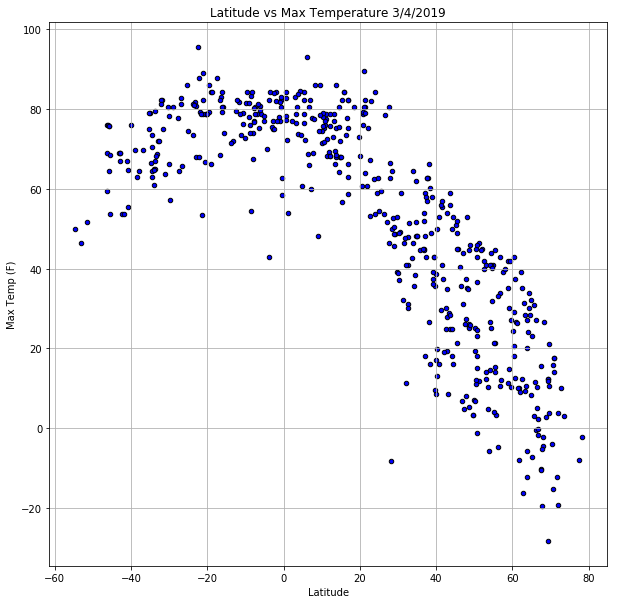

In [14]:
# Map Latitude vs Temperature Plot (lvt)
lvt=WeatherStat.plot(kind='Scatter',x='Lat',y='Max Temp',marker='o',color='b',figsize=(10,10),edgecolors='black')
lvt.grid()
lvt.set_title(f'Latitude vs Max Temperature {CurrentDate}')
lvt.set_ylabel('Max Temp (F)')
lvt.set_xlabel('Latitude')
fig=lvt.get_figure();
fig.savefig("Scatter Plot Latitude vs Temperature.png")

#### Latitude vs. Humidity Plot

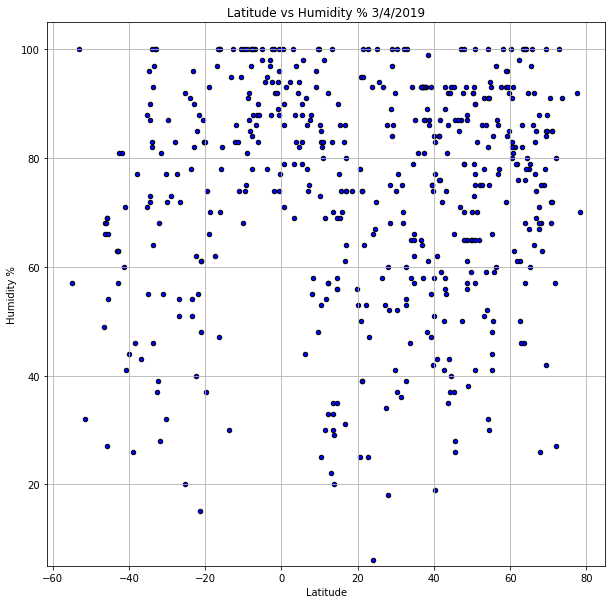

In [22]:
# Map Latitude vs Humidity Plot (lvh)
lvh=WeatherStat.plot(kind='Scatter',x='Lat',y='Humidity' ,ylim=(5,105),marker='o',color='b',figsize=(10,10),edgecolors='black')
lvh.grid()
lvh.set_title(f'Latitude vs Humidity % {CurrentDate}')
lvh.set_ylabel('Humidity %')
lvh.set_xlabel('Latitude')
fig=lvh.get_figure();
fig.savefig("Scatter Plot Latitude vs Humidity.png")

#### Latitude vs. Cloudiness Plot

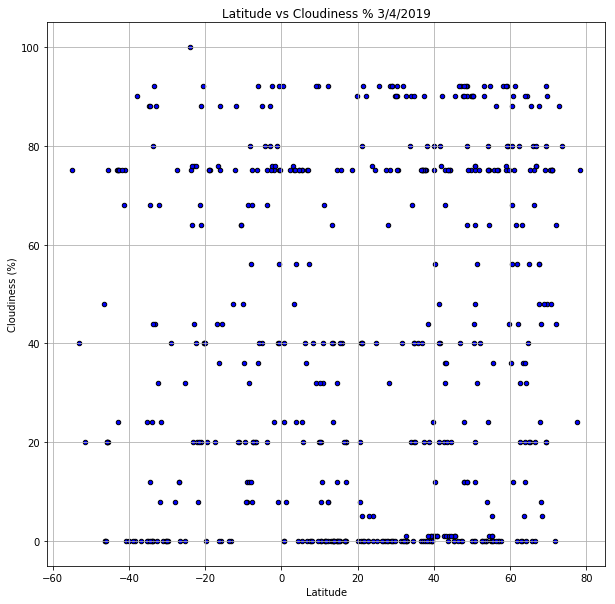

In [16]:
# Map Latitude vs Cloudiness Plot (lvc)
lvc=WeatherStat.plot(kind='Scatter',x='Lat',y='Cloudiness',marker='o',color='b',figsize=(10,10),edgecolors='black')
lvc.grid()
lvc.set_title(f'Latitude vs Cloudiness % {CurrentDate}')
lvc.set_ylabel('Cloudiness (%)')
lvc.set_xlabel('Latitude')
fig=lvc.get_figure();
fig.savefig("Scatter Plot Latitude vs Cloudiness.png")

#### Latitude vs. Wind Speed Plot

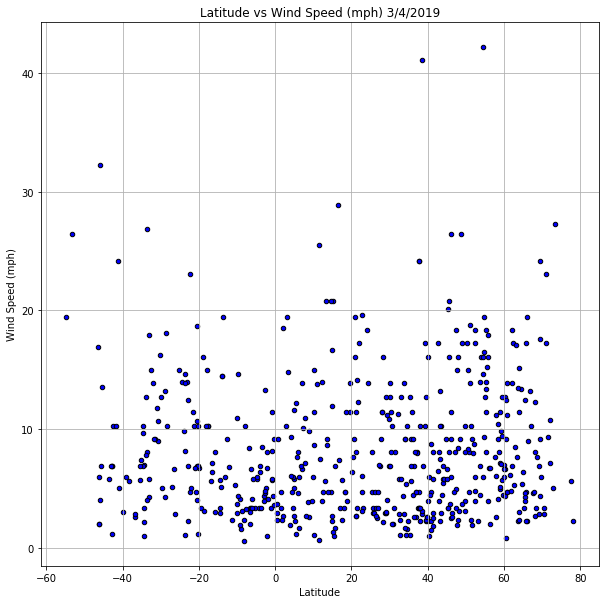

In [13]:
# Map Latitude vs Wind Speed Plot (lvws)
lvws=WeatherStat.plot(kind='Scatter',x='Lat',y='Wind Speed',marker='o',color='b',figsize=(10,10),edgecolors='black')
lvws.grid()
lvws.set_title(f'Latitude vs Wind Speed (mph) {CurrentDate}')
lvws.set_ylabel('Wind Speed (mph)')
lvws.set_xlabel('Latitude')
fig=lvws.get_figure();
fig
fig.savefig("Scatter Plot Latitude vs Wind Speed.png")